In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Steps to be Performed
- Data cleaning
- EDA
- Text Preprocessing
- Model Building
- Evaluation
- Improvements
- Website
- Deploy

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Dropping last 3 columns

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(10)

,v1,v2
1870,ham,"Aight, I'll text you when I'm back"
1048,ham,I walked an hour 2 c u! doesnåÕt that show I c...
3094,ham,Olol i printed out a forum post by a guy with ...
3779,ham,Then ur physics get a-?
1027,ham,Are you not around or just still asleep? :V
5258,ham,1 in cbe. 2 in chennai.
1259,ham,We have sent JD for Customer Service cum Accou...
4026,ham,"Yes, princess. Are you going to make me moan?"
3866,ham,"Alright we're hooked up, where you guys at"
37,ham,I see the letter B on my car


In [8]:
## Renaming the columns

df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [9]:
## applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
## Check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
## check for duplicate values

df.duplicated().sum()

403

In [14]:
## remove duplicates

df.drop_duplicates(keep='first', inplace=True)

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA (Exploratory Data Analysis)

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

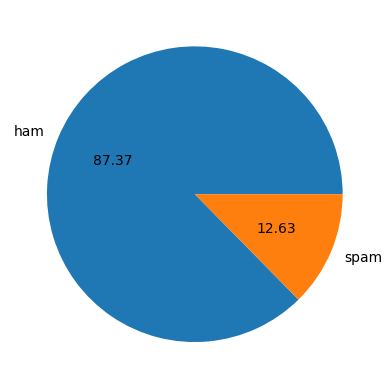

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
## Data is Imbalanced

## We need to perform deeper analysis like
- No. of characters in the SMS
- No. of words in the SMS
- No. of sentences in the SMS

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
## No of characters
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
## No of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
## No of sentences

df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
## Use describe function

df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
## Describe func output for Ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
## Describe func output for spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## Plot histograms

In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

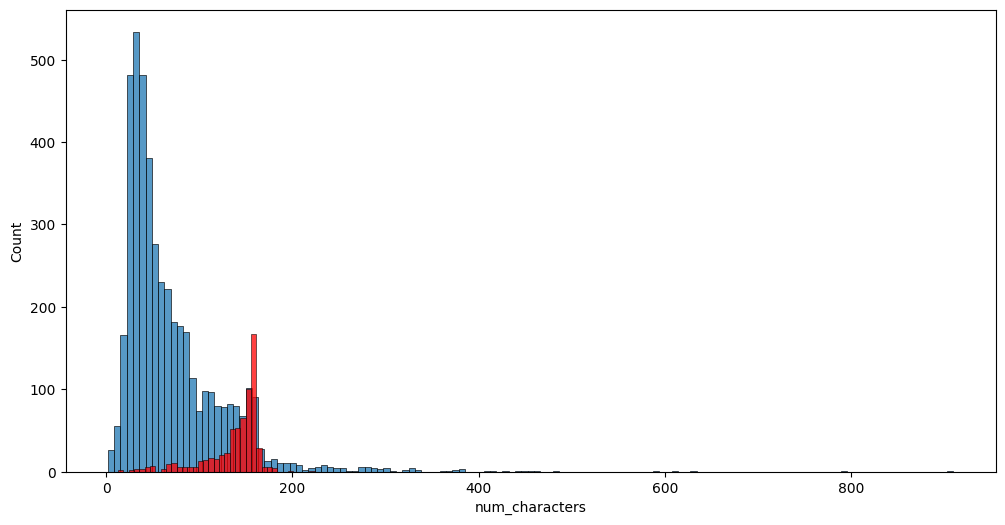

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

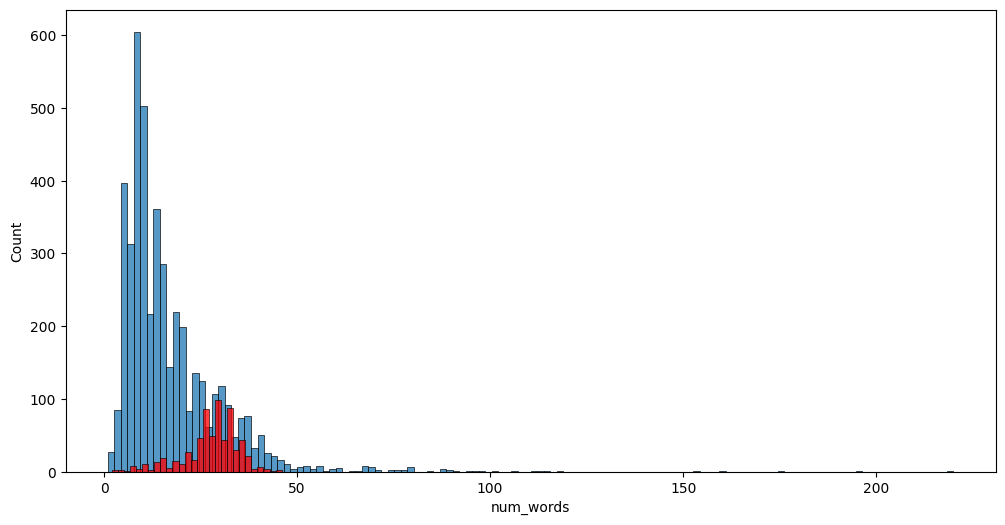

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

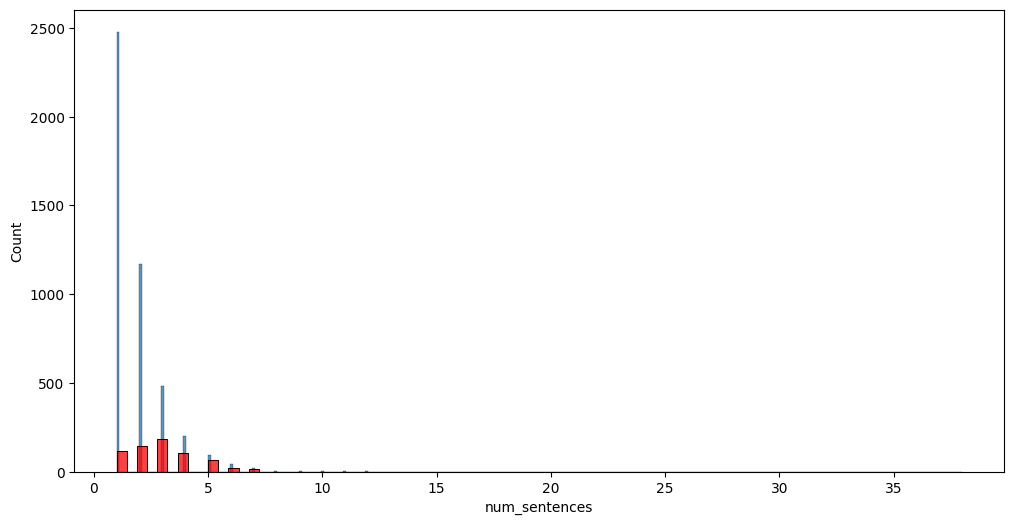

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

## Lets see the relationship between these columns

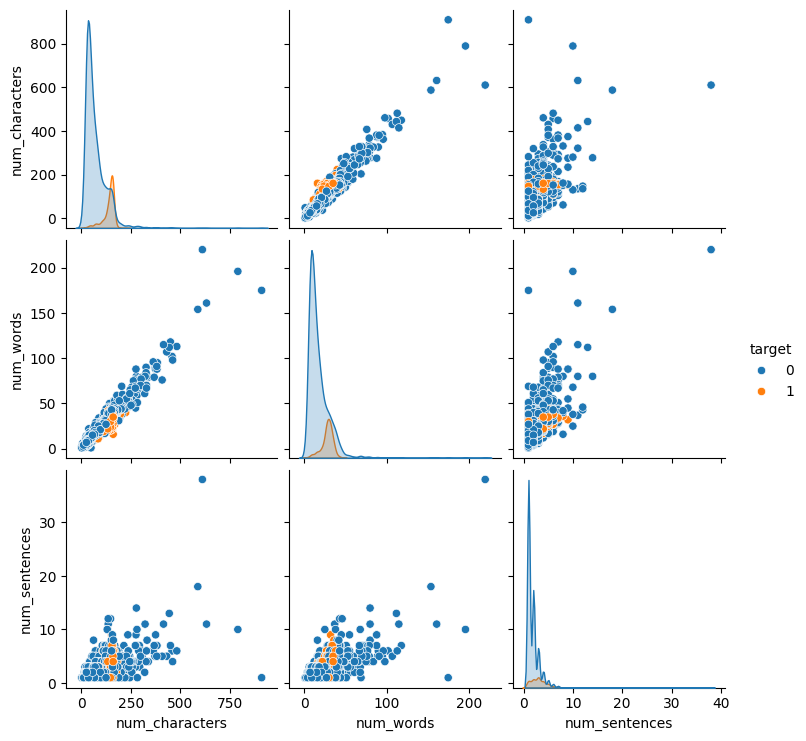

In [34]:
sns.pairplot(df,hue='target')

<Axes: >

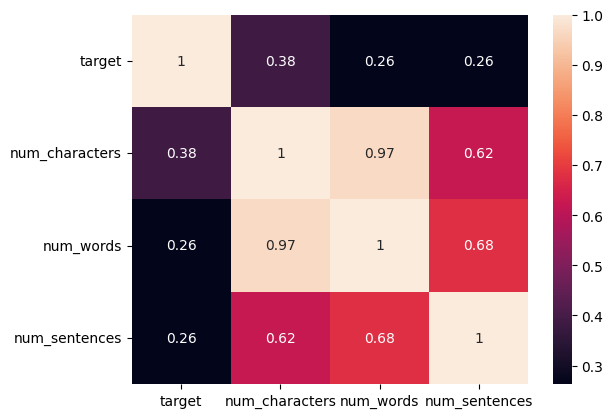

In [38]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

- Based on this we can see there is multi collinearity
- So we will choose one column from those 3 columns. We can choose num_characters as it has variance with target columns

# 3. Data Preprocessing
- lower case
- Tokenization
- Removing special characters
- removing stop words and punctuation
- stemming

In [46]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [43]:
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [44]:
## Single function which does the above data preprocessing
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(lemmatizer.lemmatize(i))

  return " ".join(y)

In [47]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [48]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [50]:
df['transformed_text'] = df['text'].apply(transform_text)

- Lets now create the WordCloud Which says what are the important words for Spam and Not Spam messages

In [56]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')

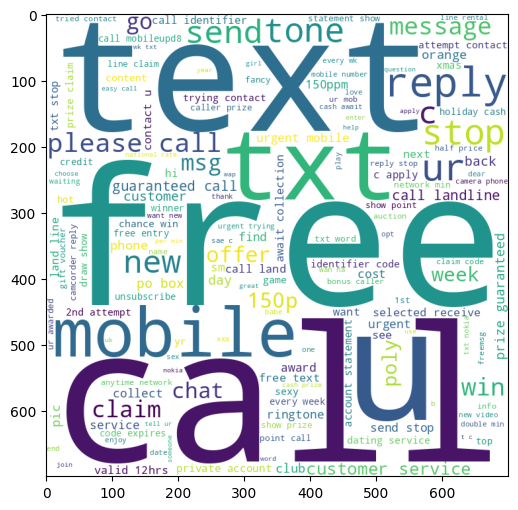

In [62]:
# Spam Word Cloud
plt.figure(figsize=(12,6))
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
spam_wc = wc.generate(spam_text)
plt.imshow(spam_wc)

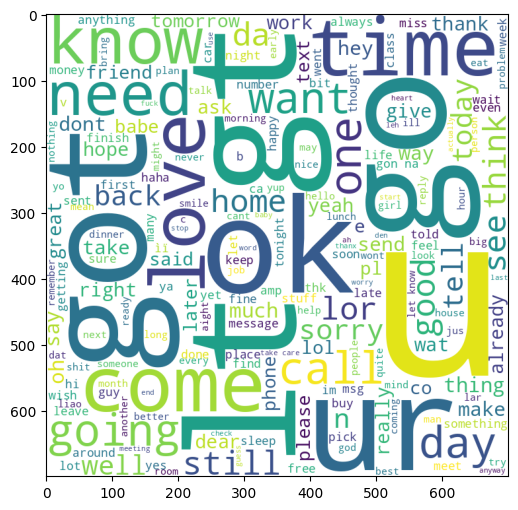

In [63]:
# Ham Word Cloud

plt.figure(figsize=(12,6))
spam_text = df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")
spam_wc = wc.generate(spam_text)
plt.imshow(spam_wc)

## We Need to find the top 30 or 50 words

In [66]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [67]:
len(spam_corpus)

9939

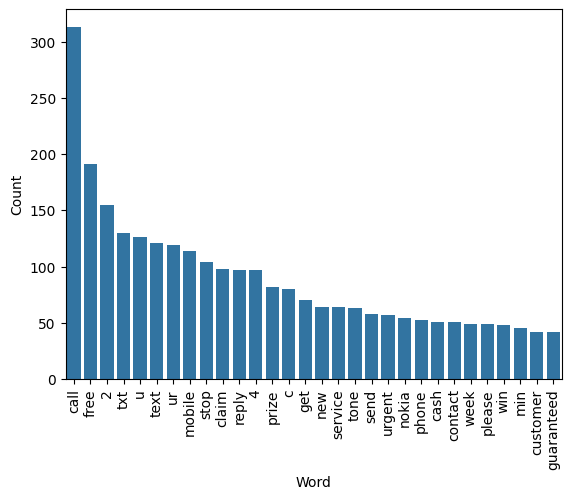

In [72]:
from collections import Counter
# Count the occurrences of each word in the spam corpus
word_counts = Counter(spam_corpus)

# Get the 30 most common words and their counts
top_30_words = word_counts.most_common(30)

# Create a DataFrame from the top 30 words
df_top_30 = pd.DataFrame(top_30_words, columns=['Word', 'Count'])

# Create the bar plot using Seaborn
sns.barplot(x='Word', y='Count', data=df_top_30)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [73]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [74]:
len(ham_corpus)

35404

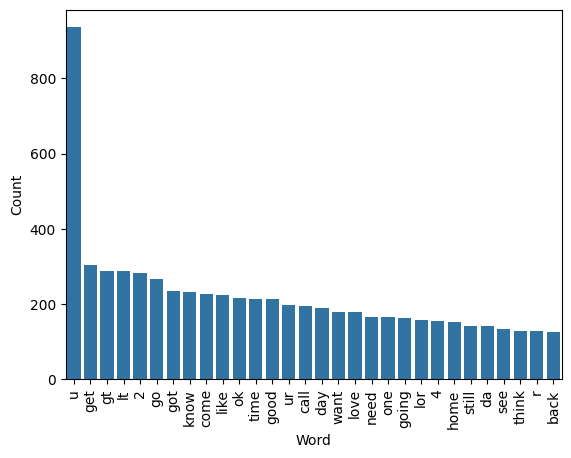

In [75]:
from collections import Counter
# Count the occurrences of each word in the spam corpus
word_counts = Counter(ham_corpus)

# Get the 30 most common words and their counts
top_30_words = word_counts.most_common(30)

# Create a DataFrame from the top 30 words
df_top_30 = pd.DataFrame(top_30_words, columns=['Word', 'Count'])

# Create the bar plot using Seaborn
sns.barplot(x='Word', y='Count', data=df_top_30)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# 4. Model Building

In [145]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [146]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [147]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [148]:
## appending the num_character column to X
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [149]:
X.shape

(5169, 3001)

In [150]:
y = df['target'].values

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [153]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [154]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [155]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9032882011605415
[[814  82]
 [ 18 120]]
0.594059405940594


In [156]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9448742746615088
[[896   0]
 [ 57  81]]
1.0


In [157]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[896   0]
 [ 16 122]]
1.0


## Lets check with other ML algorithms

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [172]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
adc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [173]:
clfs = {
    'SVC' : svc,
    'KN': knc,
    'NB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': adc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [174]:
def train_classifier(clf,X_train,y_train,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision


In [175]:
train_classifier(bnb,X_train,y_train,y_test)

(0.9845261121856866, 1.0)

In [176]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,y_test)
  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9323017408123792
Precision -  0.8090909090909091
For  NB
Accuracy -  0.9845261121856866
Precision -  1.0
For  DT
Accuracy -  0.9497098646034816
Precision -  0.9056603773584906
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9423076923076923
For  RF
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9145299145299145
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8646616541353384
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.968
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9387755102040817
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9354838709677419


In [177]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [178]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.984526,1.000000
5,RF,0.976789,0.983051
8,ETC,0.979691,0.968000
4,LR,0.955513,0.942308
9,GBDT,0.949710,0.938776
10,xgb,0.970986,0.935484
6,AdaBoost,0.960348,0.914530
3,DT,0.949710,0.905660
7,BgC,0.960348,0.864662
1,KN,0.932302,0.809091


# Model Improvements


- Added max_features=3000 hyper parameter to tfidf which increased the accuracy of NB to 98% with precision as 1.0
- When scaling is done, The precision and accuracy of most of the columns became less.
- So lets just add max_features hyper parameter.
- Even though I have added another column which is num_character which has strong relation with output, The accuracy and precision becomes low.
- I have added Voting Classifier of 3 most performing algorithms which are Naive bayes, RandomForest, ExtraTreesClassifier. Even then accuracy and precision not increased. Even StackingClassifier also has no use.

- ## We decide to use the Bernoulli Naive Bayes which has 98% accuracy and 1.0 precision score when we added max_features=3000 to tfidf.

## Create the Pipeline
- Applying transformations
- Vectorization
- Applying algorithm (Bermoulli NB)

In [179]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))
